# <font color='teal'>**Project Objective and Scope**</font>


<font color='teal'>**Objective:**</font>
The main goal of this project is to identify factors that contribute to customer churn in the telecom industry. By understanding the key drivers of churn, we can provide actionable insights to help reduce churn rates and improve customer retention strategies.

<font color='teal'>**Scoop:**</font>
We will analyze the Telco Customer Churn dataset and focus on the following:

- Identify customer demographics, subscription features, and billing information that correlate with churn.
- Build a predictive model to forecast customer churn based on these factors.
- Provide recommendations based on insights derived from the model and analysis.



**Dataset Link:** BlastChar (2018) Telco customer churn, Kaggle. Available at: https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data (Accessed: 23 September 2024).

# <font color='teal'>**Data Exploration**</font>

In [ ]:
import pandas as pd
df = pd.read_csv('Telco-Customer-Churn.csv')
# View first few rows of the dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


According BlastChar the data set includes information about (2018):

"
- Customers who left within the last month – the column is called Churn

- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

- Customer account information - how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

- Demographic info about customers – gender, age range, and if they have partners and dependents"

In [ ]:
# Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Check for missing values
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
# Summary statistics for numerical features
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# <font color='teal'>**Data Collection and Preprocessing**</font>

- Encode categorical variables into numerical values.
- Normalize continuous features.
- Split the data into features and target labels.

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [ ]:
# Encode binary categorical variables using LabelEncoder
label_encoder = LabelEncoder()
binary_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

for column in binary_columns:
    df.loc[:, column] = label_encoder.fit_transform(df[column])  # Use .loc to avoid SettingWithCopyWarning


In [ ]:
# One-hot encode categorical columns with more than two categories
df_encoded = pd.get_dummies(df, columns=['MultipleLines', 'InternetService', 'OnlineSecurity',
                                             'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                             'StreamingTV', 'StreamingMovies', 'Contract',
                                             'PaymentMethod'], drop_first=True)

In [ ]:
# Separate features (X) and target variable (y)
X = df_encoded.drop(columns=['customerID', 'Churn'])
y = df_encoded['Churn']

In [ ]:
# Display the cleaned and encoded dataset
print("First 5 rows of features (X):")
print(X.head())

First 5 rows of features (X):
  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0      0              0       1          0       1            0   
1      1              0       0          0      34            1   
2      1              0       0          0       2            1   
3      1              0       0          0      45            0   
4      0              0       0          0       2            1   

  PaperlessBilling  MonthlyCharges  TotalCharges  \
0                1           29.85         29.85   
1                0           56.95       1889.50   
2                1           53.85        108.15   
3                0           42.30       1840.75   
4                1           70.70        151.65   

   MultipleLines_No phone service  ...  TechSupport_Yes  \
0                            True  ...            False   
1                           False  ...            False   
2                           False  ...            False   
3                 

In [ ]:
print("\nTarget variable (y):")
print(y.head())



Target variable (y):
0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: object


In [ ]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


TotalCharges has 11 missing value

In [ ]:
df[np.isnan(df['TotalCharges'])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,0,0,1,1,0,0,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,1,Bank transfer (automatic),52.55,NaN,0
753,3115-CZMZD,1,0,0,1,0,1,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,0,Mailed check,20.25,NaN,0
936,5709-LVOEQ,0,0,1,1,0,1,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,0,Mailed check,80.85,NaN,0
1082,4367-NUYAO,1,0,1,1,0,1,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,0,Mailed check,25.75,NaN,0
1340,1371-DWPAZ,0,0,1,1,0,0,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,0,Credit card (automatic),56.05,NaN,0
3331,7644-OMVMY,1,0,1,1,0,1,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,0,Mailed check,19.85,NaN,0
3826,3213-VVOLG,1,0,1,1,0,1,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,0,Mailed check,25.35,NaN,0
4380,2520-SGTTA,0,0,1,1,0,1,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,0,Mailed check,20.00,NaN,0
5218,2923-ARZLG,1,0,1,1,0,1,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,1,Mailed check,19.70,NaN,0
6670,4075-WKNIU,0,0,1,1,0,1,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,0,Mailed check,73.35,NaN,0


Tenure column is 0 for these entries as well.

In [ ]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index

Index([], dtype='int64')

To solve the problem of missing values in TotalCharges column, we can fill it with the mean of TotalCharges values.

In [ ]:
df.fillna(df["TotalCharges"].mean())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.50,0
7039,2234-XADUH,0,0,1,1,72,1,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,0,0,1,1,11,0,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0
7041,8361-LTMKD,1,1,1,0,4,1,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.60,1


In [ ]:
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [ ]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series
df = df.apply(lambda x: object_to_int(x))
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


# <font color='teal'>**Exploratory Data Analysis (EDA)**</font>

In [ ]:
# Summary of the numerical features in the dataset
summary_statistics = X.describe()

In [ ]:
# Distribution of the target variable (Churn) in percentage
churn_distribution = y.value_counts(normalize=True) * 100  # convert to percentage

# Display summary statistics
print("Summary Statistics of Numerical Features:")
print(summary_statistics)

# Display churn distribution
print("\nChurn Distribution (in %):")
print(churn_distribution)

Summary Statistics of Numerical Features:
       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7032.000000
mean        0.162147    32.371149       64.761692   2283.300441
std         0.368612    24.559481       30.090047   2266.771362
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.850000   3794.737500
max         1.000000    72.000000      118.750000   8684.800000

Churn Distribution (in %):
Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64


<ipython-input-37-e379660aae9e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="Set2")


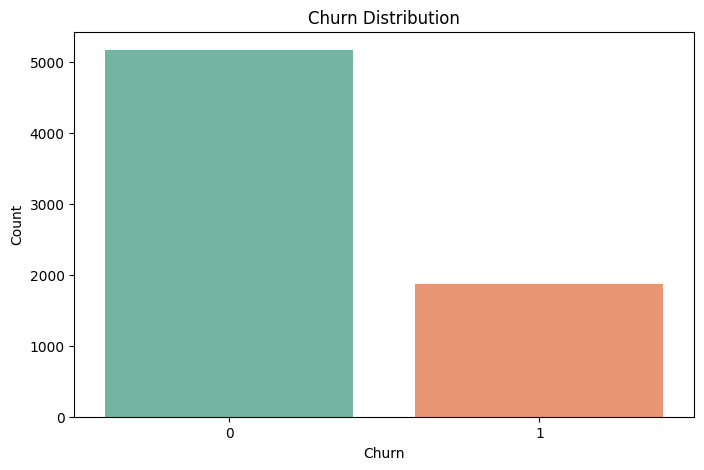

In [ ]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot
plt.figure(figsize=(8, 5))

# Churn Distribution Plot
sns.countplot(x=y, palette="Set2")
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


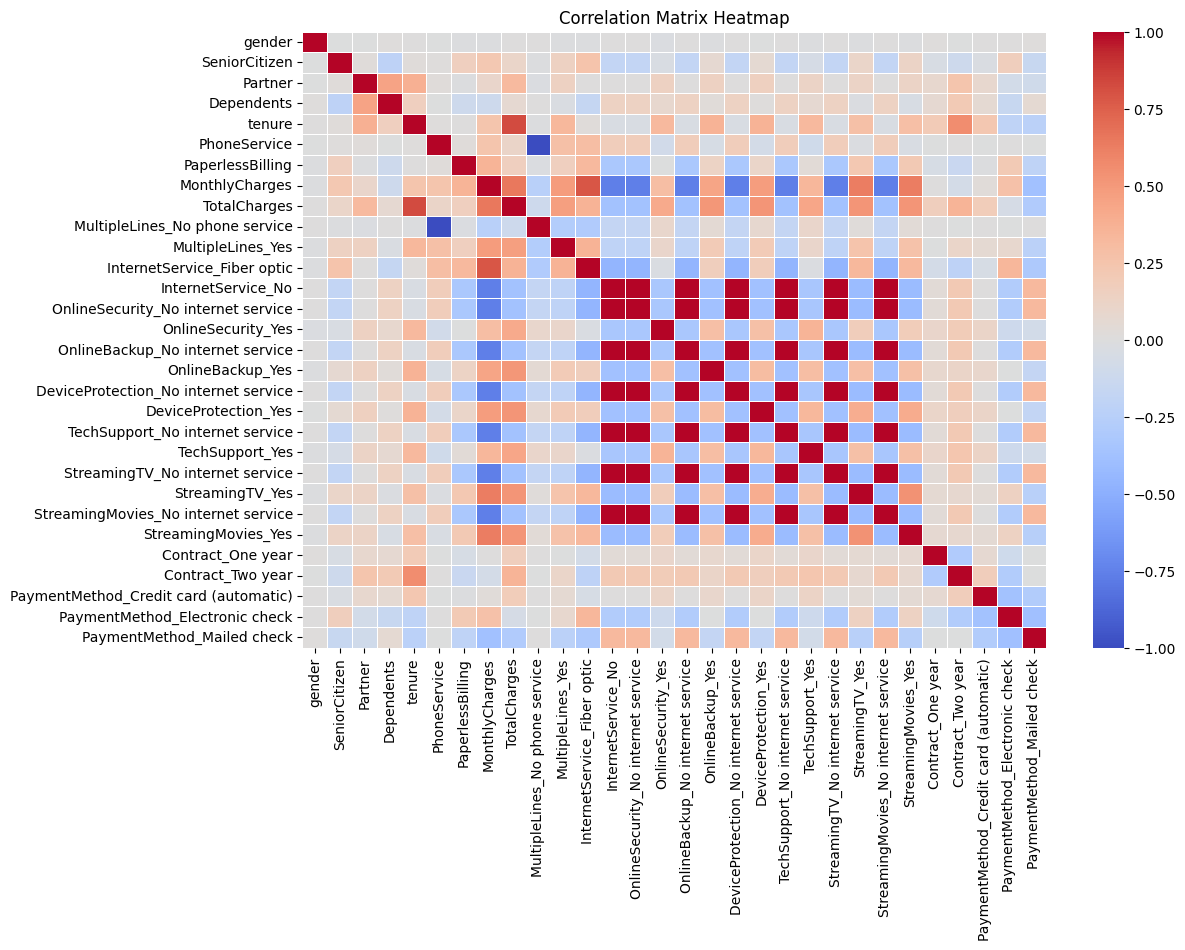

In [ ]:
# Correlation Matrix
plt.figure(figsize=(12, 8))
correlation_matrix = X.corr()

# Correlation Heatmap
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


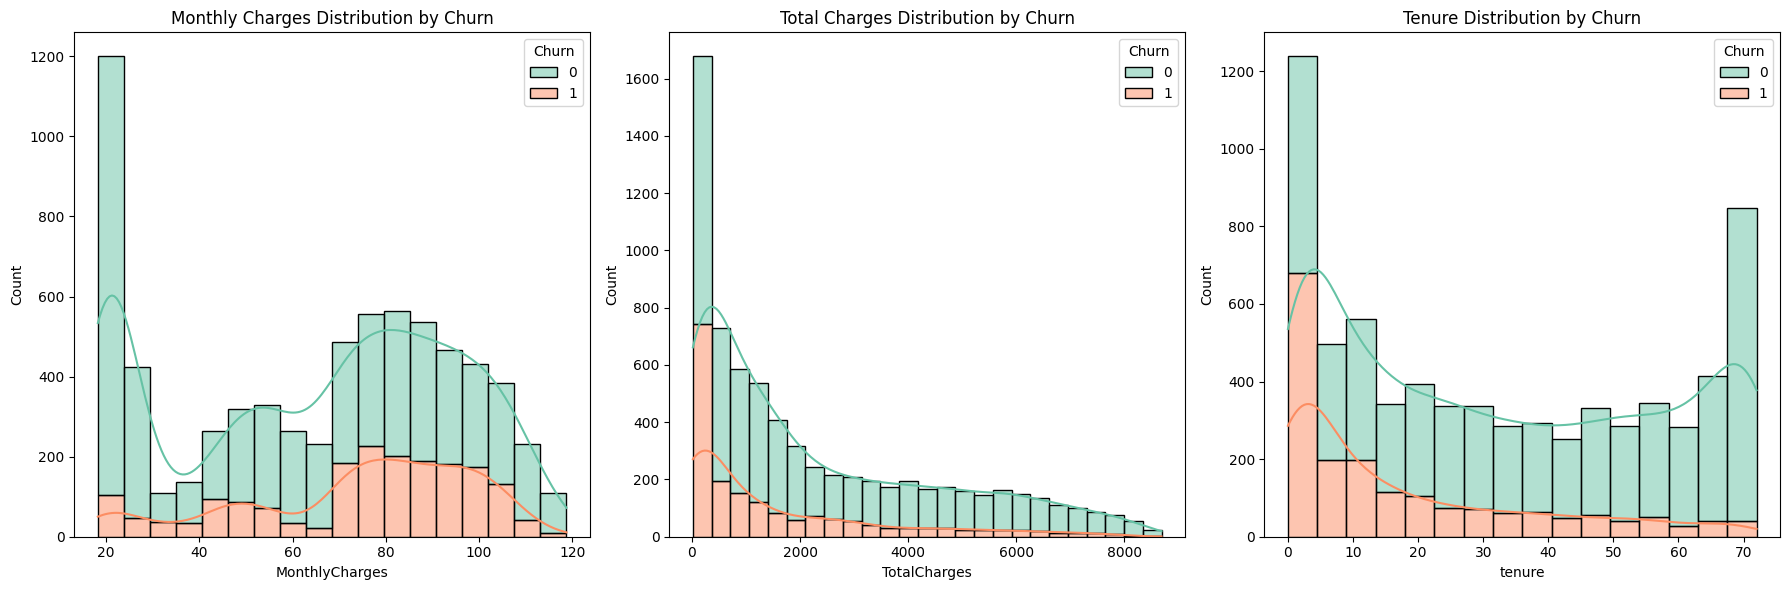

In [ ]:
# Set up the plotting grid
plt.figure(figsize=(18, 6))

# Monthly Charges distribution by Churn status
plt.subplot(1, 3, 1)
sns.histplot(data=X, x='MonthlyCharges', hue=y, multiple='stack', palette="Set2", kde=True)
plt.title('Monthly Charges Distribution by Churn')

# Total Charges distribution by Churn status
plt.subplot(1, 3, 2)
sns.histplot(data=X, x='TotalCharges', hue=y, multiple='stack', palette="Set2", kde=True)
plt.title('Total Charges Distribution by Churn')

# Tenure distribution by Churn status
plt.subplot(1, 3, 3)
sns.histplot(data=X, x='tenure', hue=y, multiple='stack', palette="Set2", kde=True)
plt.title('Tenure Distribution by Churn')

plt.tight_layout()
plt.show()


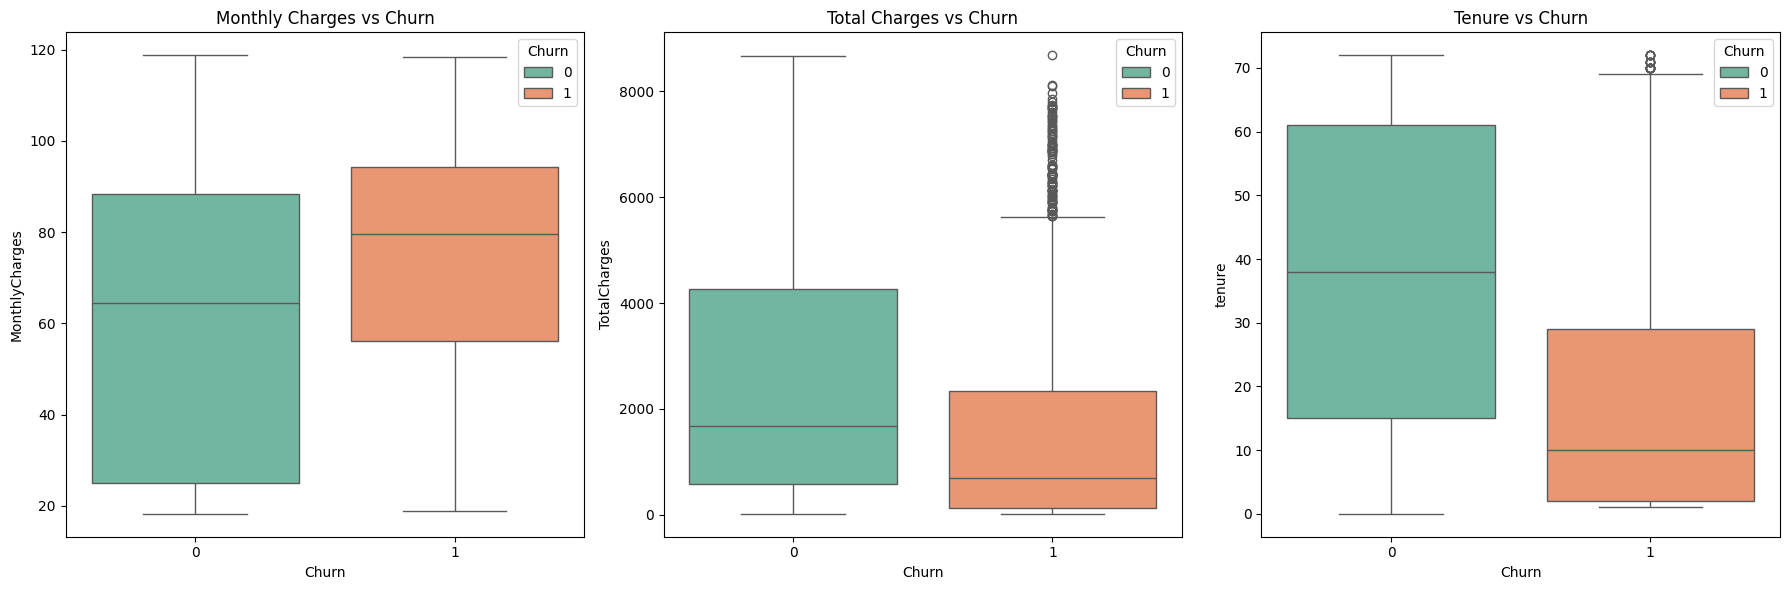

In [ ]:
# Box plot to compare distributions of key numerical features by churn status
plt.figure(figsize=(18, 6))

# Monthly Charges box plot
plt.subplot(1, 3, 1)
sns.boxplot(x=y, y='MonthlyCharges', data=X, palette="Set2", hue=y)
plt.title('Monthly Charges vs Churn')

# Total Charges box plot
plt.subplot(1, 3, 2)
sns.boxplot(x=y, y='TotalCharges', data=X, palette="Set2", hue=y)
plt.title('Total Charges vs Churn')

# Tenure box plot
plt.subplot(1, 3, 3)
sns.boxplot(x=y, y='tenure', data=X, palette="Set2", hue=y)
plt.title('Tenure vs Churn')

plt.tight_layout()
plt.show()


# <font color='teal'>**Model Building**</font>

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Step 1: Scaling the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Step 2: Train-Test Split (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: Logistic Regression Model with increased iterations
log_reg = LogisticRegression(max_iter=2000)  # Increased max_iter
log_reg.fit(X_train, y_train)

# Step 4: Model Predictions
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]

# Step 5: Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 6: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Accuracy: 0.8070
Precision: 0.6584
Recall: 0.5668
F1 Score: 0.6092
ROC-AUC: 0.8417

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.57      0.61       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409


Confusion Matrix:
[[925 110]
 [162 212]]


# <font color='teal'>**Communicating the Results**</font>

1. **Project Objective:**
The goal of this project was to identify factors contributing to customer churn and build a model that predicts which customers are most likely to churn. By understanding these factors, the company can take steps to reduce churn rates and improve customer retention strategies.
2. **Key Findings:**
- Churn Trends: The analysis revealed that customers with higher MonthlyCharges and shorter tenure are more likely to churn. Customers on month-to-month contracts also have a higher churn rate.
- Demographics: There was no strong correlation between demographic features like gender and churn, suggesting that service-related features play a bigger role in customer retention.

# <font color='teal'>**GitHub Link**</font>

# <font color='teal'>**Assessment Submission Form**</font>

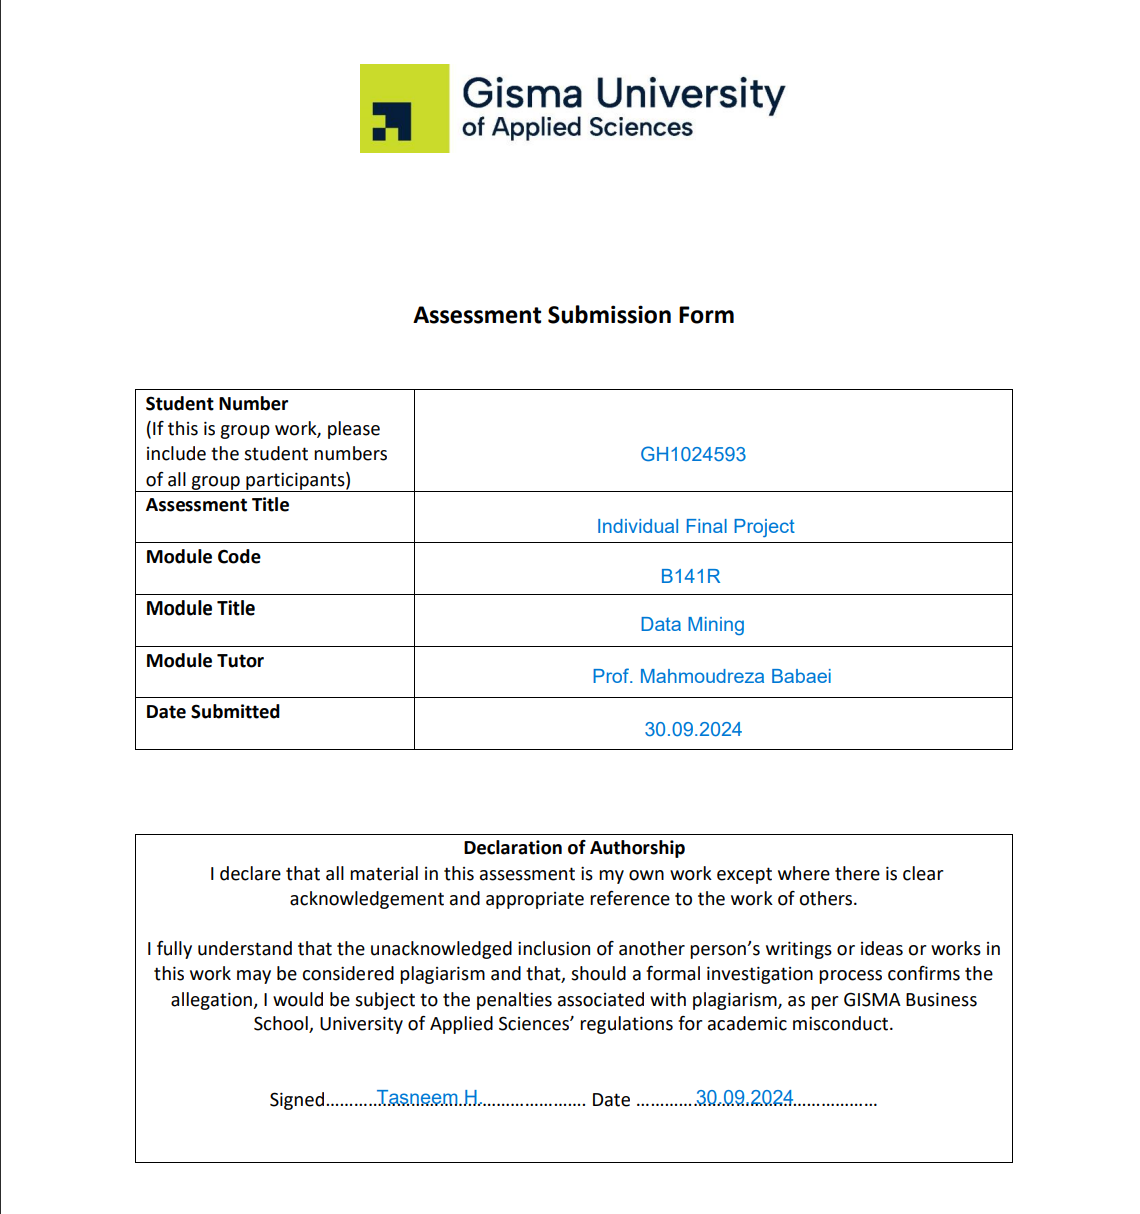